In [21]:
#append partent directory to path
import sys,os
sys.path.append('../..')
from studies import t1dexi
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from importlib import reload
from src import drawing,cdf
from src import pandas_helper as ph
reload(ph)
from src.pandas_helper import head_tail

In [ ]:
reload(t1dexi)
study = t1dexi.T1DEXI(study_path=os.path.join(os.getcwd(), '..', '..', 'data', 'raw', 'T1DEXI'))
study.load_data()


In [7]:
df_basal = study.extract_basal_event_history()

Dropping 14020 rows with NaN basal rates


/var/folders/m4/5d02b2xs0l52lbxzbk0t3vym0000gp/T/ipykernel_87297/2830676823.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tdd = df_basal.groupby('patient_id').apply(tdd.calculate_daily_basal_dose)


patient_id
981     86.608775
77      62.138016
870     57.550844
1142    52.723159
1138    49.758632
Name: basal, dtype: float64

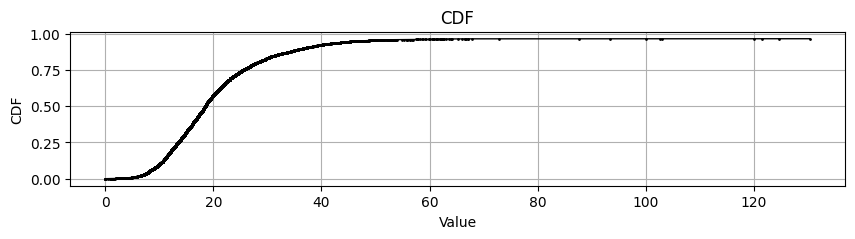

In [8]:
#draw tdd cdf
from src import tdd
from src import cdf
tdd = df_basal.groupby('patient_id').apply(tdd.calculate_daily_basal_dose)

plt.figure(figsize=(10,2));ax=plt.gca()
cdf.plot_cdf(tdd.basal,ax=ax)
display(tdd.basal.groupby('patient_id').mean().sort_values(ascending=False).head())

,basal
date,
2020-05-12,NaN
2020-05-13,64.054418
2020-05-14,103.039079
2020-05-15,124.738685
2020-05-16,121.539771
2020-05-17,119.979119
2020-05-18,57.618269
2020-05-19,NaN
2020-05-20,NaN


,USUBJID,FATEST,FAORRES,FADTC,FADUR,INSNMBOL,INSEXBOL,DXTRT
974769,981,BASAL INSULIN,65.0,2020-05-12 09:38:43,NaT,NaN,NaN,MULTIPLE DAILY INJECTIONS
979335,981,BASAL INSULIN,65.0,2020-05-13 09:30:50,NaT,NaN,NaN,MULTIPLE DAILY INJECTIONS
983470,981,BASAL INSULIN,65.0,2020-05-14 10:11:53,NaT,NaN,NaN,MULTIPLE DAILY INJECTIONS
985274,981,BASAL INSULIN,65.0,2020-05-14 22:01:29,NaT,NaN,NaN,MULTIPLE DAILY INJECTIONS
987056,981,BASAL INSULIN,60.0,2020-05-15 09:30:14,NaT,NaN,NaN,MULTIPLE DAILY INJECTIONS
988515,981,BASAL INSULIN,60.0,2020-05-15 21:45:02,NaT,NaN,NaN,MULTIPLE DAILY INJECTIONS
990379,981,BASAL INSULIN,60.0,2020-05-16 10:06:22,NaT,NaN,NaN,MULTIPLE DAILY INJECTIONS
991908,981,BASAL INSULIN,60.0,2020-05-16 21:30:21,NaT,NaN,NaN,MULTIPLE DAILY INJECTIONS
994003,981,BASAL INSULIN,60.0,2020-05-17 09:30:47,NaT,NaN,NaN,MULTIPLE DAILY INJECTIONS
995768,981,BASAL INSULIN,60.0,2020-05-17 21:22:03,NaT,NaN,NaN,MULTIPLE DAILY INJECTIONS


,patient_id,datetime,basal_rate
974769,981,2020-05-12 09:38:43,2.723242
979335,981,2020-05-13 09:30:50,2.633267
983470,981,2020-05-14 10:11:53,5.496054
985274,981,2020-05-14 22:01:29,5.662432
987056,981,2020-05-15 09:30:14,4.899292
988515,981,2020-05-15 21:45:02,4.856115
990379,981,2020-05-16 10:06:22,5.263286
991908,981,2020-05-16 21:30:21,4.996993
994003,981,2020-05-17 09:30:47,5.061393
995768,981,2020-05-17 21:22:03,4.726477


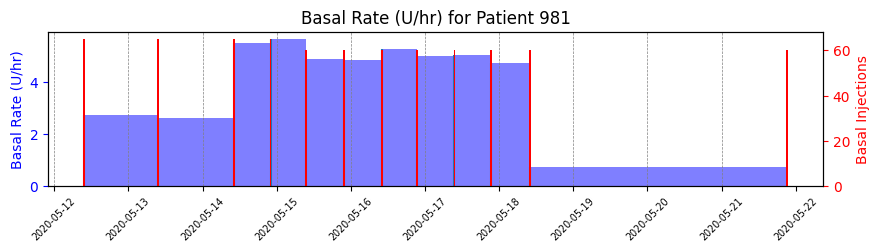

In [11]:
#draw patient with highest tdd
patient = '981'
display(tdd.xs(patient, level=0))

temp = df_basal.loc[df_basal['patient_id']==patient]
sub_df = df_basal.loc[df_basal['patient_id']==patient]
sub_facm= study.facm.loc[(study.facm.USUBJID==patient) & (study.facm.FATEST=='BASAL INSULIN')]

plt.figure(figsize=(10,2)); ax=plt.gca()
drawing.drawBasal(ax,temp.datetime,temp.basal_rate,label='Basal Rate (U/hr)')
twin_ax = ax.twinx()   
drawing.drawBoluses(twin_ax,sub_facm.FADTC,sub_facm.FAORRES,label='Basal Injections',width=timedelta(minutes=30))


#add vertical lines for midnights
midnights = pd.date_range(start=temp.datetime.min().normalize(), end=temp.datetime.max(), freq='D')
for midnight in midnights:
    ax.axvline(midnight, color='gray', linestyle='--', linewidth=0.5)

plt.xlabel('Date')
ax.set_ylabel('Basal Rate (U/hr)')
twin_ax.set_ylabel('Basal Injections')
plt.title('Basal Rate (U/hr) for Patient {}'.format(patient))
twin_ax.tick_params(axis='y', colors='red')
twin_ax.yaxis.label.set_color('red')

ax.tick_params(axis='y', colors='blue')
ax.yaxis.label.set_color('blue')

ax.xaxis.set_tick_params(rotation=45, labelsize='x-small')

display(sub_facm)
display(sub_df)

# Save the figure
file = os.path.join(os.getcwd(),'..','..','docs','data_sets','assets','t1dexi_medi_basal_rate_vs._injections.png')
plt.savefig(file)

In this patient we see that basal injections are sometimes missed causing strong variation in estimated basal rates. The last basal rate is set to 0 because we can't calcualte the time until the next value. We could fill these with previous estimates. However, in this patient it wouldn't work as previous injections were either not injected or missed to log.  

In [26]:
## extract boluses

#assign FAORRES to INSNMBOL if INSNMBOL is NaN
bolus_rows = study.facm.loc[study.facm.FATEST=='BOLUS INSULIN'].copy()
bolus_rows.loc[(bolus_rows.FATEST=='BOLUS INSULIN') & bolus_rows[['INSEXBOL','INSNMBOL']].isna().all(axis=1),'INSNMBOL'] = bolus_rows.FAORRES

# Replace values in FAORRES, INSEXBOL, INSMBOL that are < 1e-20 with zero
bolus_rows.loc[bolus_rows.FAORRES < 1e-20, 'FAORRES'] = 0
bolus_rows.loc[bolus_rows.INSEXBOL < 1e-20, 'INSEXBOL'] = 0
bolus_rows.loc[bolus_rows.INSNMBOL < 1e-20, 'INSNMBOL'] = 0
 
bolus_rows.loc[:,'INSNMBOL'] = bolus_rows.INSNMBOL.fillna(0)
bolus_rows.loc[:,'INSEXBOL'] = bolus_rows.INSEXBOL.fillna(0)
 
#split extended and normal boluses
normal   = bolus_rows.loc[bolus_rows.INSNMBOL>0][['USUBJID','FADTC','FADUR','INSNMBOL']].copy()
normal = normal.rename(columns={'INSNMBOL':'bolus'})
extended = bolus_rows.loc[bolus_rows.INSEXBOL>0][['USUBJID','FADTC','FADUR','INSEXBOL']].copy()
extended = extended.rename(columns={'INSEXBOL':'bolus'})

#when there was a normal bolus, it would still carry the extended bolus duration
normal['FADUR'] = timedelta(0)

concat = pd.concat([normal,extended],ignore_index=True)

display(normal.head(3))
display(extended.head(3))  
display(head_tail(concat))
assert (len(normal)+len(extended)) == len(concat)

,USUBJID,FADTC,FADUR,bolus
26,576,2019-02-21 23:31:22,0 days,5.3
33,576,2019-02-22 02:52:24,0 days,8.8
36,576,2019-02-22 05:45:00,0 days,8.4


,USUBJID,FADTC,FADUR,bolus
2897,317,2019-02-28 06:27:59,0 days 01:00:00,1.18
3075,317,2019-02-28 13:00:32,0 days 00:45:00,1.09
13597,873,2019-03-13 08:24:11,0 days 01:30:00,0.55


,USUBJID,FADTC,FADUR,bolus
0,576,2019-02-21 23:31:22,0 days 00:00:00,5.30
1,576,2019-02-22 02:52:24,0 days 00:00:00,8.80
114896,1143,2021-07-02 20:45:05,0 days 02:00:00,4.75
114897,1143,2021-07-10 20:48:16,0 days 03:00:00,6.90


Dropping 14020 rows with NaN basal rates


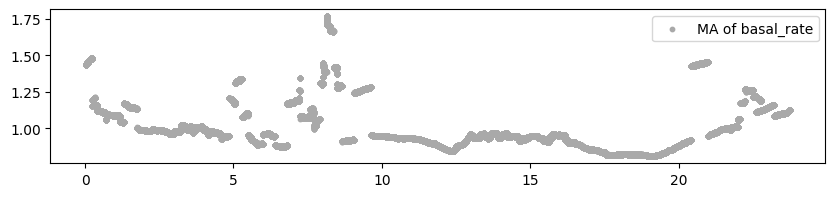

In [ ]:
from src import drawing
reload(drawing)

df_basal = study.extract_basal_event_history()
plt.figure(figsize=(10,2));ax=plt.gca()

drawing.drawMovingAverage(ax, df_basal, 'datetime', 'basal_rate', aggregator='mean')